# Regresión lineal simple en Python
<br>
https://github.com/joanby/python-ml-course/blob/master/notebooks/T4%20-%202%20-%20Linear%20Regression%20-%20Regresi%C3%B3n%20lineal%20con%20statsmodel.ipynb

In [0]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv")

In [0]:
import numpy as np

In [0]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [0]:
import statsmodels.formula.api as smf

In [0]:
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [0]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

100 unidades (MXN, USD, etc.) más de inversión en anuncios por TV incrementan las ventas en 4.7 unidades.

In [0]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [0]:
lm.rsquared

0.611875050850071

In [0]:
lm.rsquared_adj

0.6099148238341623

In [0]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           1.47e-42
Time:                        14:55:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

In [0]:
#ver si se ajusta la predicción de los gastos en TV con las ventas, 
#contra los valores reales se hace esta gráfica:
import matplotlib.pyplot as plt

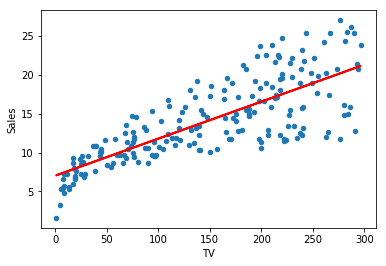

In [0]:
data.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [0]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [0]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [0]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [0]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [0]:
sales_m = np.mean(data["Sales"])
sales_m

14.022500000000003

In [0]:
error = RSE/sales_m
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

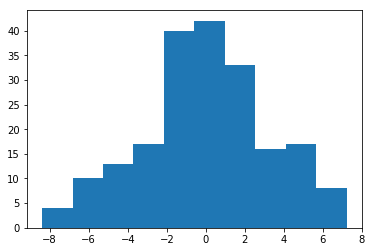

In [0]:
plt.hist((data["Sales"]-data["sales_pred"]))

# Regresión lineal múltiple
## Uso de Statsmodel

* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV + Newspaper
* Sales ~ TV + Radio
* Sales ~ Newspaper + Radio
* Sales ~ TV + Radio + Newspaper

In [0]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [0]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [0]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

####Predicción de ventas con esto:
Sales = 5.774948 + 0.046901*TV + 0.044219*Newspaper

In [0]:
lm2.rsquared

0.6458354938293271

In [0]:
lm2.rsquared_adj

0.6422399150864777

In [0]:
sales_pred2 = lm2.predict(data[["TV","Newspaper"]])

In [0]:
SSD2 = sum((data["Sales"]-sales_pred2)**2)
SSD2

1918.561811896827

In [0]:
RSE2 = np.sqrt(SSD2/(len(data)-2-1))
RSE2

3.120719860252885

In [0]:
error2 = RSE2 / sales_m
error2

0.22255089037282116

In [0]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           3.95e-45
Time:                        14:55:26   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#Añadir el Radio al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           4.83e-98
Time:                        14:55:26   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
sales_pred3 = lm3.predict(data[["TV","Radio"]])

In [0]:
#Añadir todo al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           1.58e-96
Time:                        14:55:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si baja el estadístico t sube el P-value

# Multicolinealidad
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas.
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo.
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [0]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [0]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.00461078493965

In [0]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

Con base en esto concluimos que el mejor es aquel que solo toma en cuenta para predecir las ventas la TV y el Radio (lm3).

# Validación del modelo

In [0]:
#Generación de números aleatorios con distribución normal del largo del dataset.
a = np.random.randn(len(data))

(array([ 8.,  7., 25., 26., 39., 38., 30., 19.,  5.,  3.]),
 array([-2.40547561, -1.89330966, -1.38114372, -0.86897778, -0.35681184,
         0.1553541 ,  0.66752004,  1.17968598,  1.69185192,  2.20401786,
         2.7161838 ]),
 <a list of 10 Patch objects>)

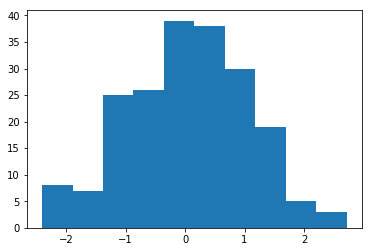

In [0]:
plt.hist(a)

In [0]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [0]:
len(training), len(testing)

(151, 49)

In [0]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [0]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     633.2
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           2.85e-73
Time:                        14:55:27   Log-Likelihood:                -295.06
No. Observations:                 151   AIC:                             596.1
Df Residuals:                     148   BIC:                             605.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6394      0.352      7.492      0.000       1.943       3.336
TV             0.0473      0.002     28.465      0.000       0.044       0.051
Radio          0.1908      0.010     20.053      0.000       0.172       0.210
==============================================================================
Omnibus:                       50.588   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.125
Skew:                          -1.381   Prob(JB):                     2.48e-28
Kurtosis:                       6.546   Cond. No.                         421.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9128 + 0.0450	TV + 0.1932 Radio

## Validación del modelo con el conjunto de testing

In [0]:
sales_pred = lm.predict(testing)
sales_pred

10      6.871692
17     23.501545
20     18.251968
25     15.738889
29      9.030634
31     11.297983
33     19.014750
34      7.431864
37     15.597203
43     14.025746
46      8.769936
48     16.397581
54     20.556651
62     16.912511
75     11.776473
80     11.346449
84     20.939491
88     11.680202
93     21.467821
101    23.581209
103    14.806330
104    20.447521
108     3.335178
111    21.318982
112    13.885993
113    16.481170
119     6.609552
121     7.668735
124    19.654528
127     6.431800
133    19.424805
134    11.749132
135    13.890915
147    23.488703
148    12.125506
151     9.963813
152    16.428887
154    15.545719
157     9.970998
167    13.410460
168    17.327831
178    16.162487
181    14.001875
182     6.384473
186     9.636583
188    18.815524
191     8.270184
195     5.151713
197    12.783591
dtype: float64

In [0]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

120.55169915084947

In [0]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE
#El - 2 es por k (el número de variables predictoras), el - 1 es por fórmula

1.6188542590285848

In [0]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.11536337797033253